# Pymaceuticals Inc.
---

### Analysis

- For the Capomulin drug treatment, it looks like the more the mouse weighs the larger the tumor weighs.
- Ramicane is one of the drugs to have fewer metastatic sights, while Naftisol has more metastatic sights.
- The correlation between the average tumor weight in grams volume in mm3: 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Specify the file paths for your data
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the data from the CSV files into two separate DataFrames
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
 
# Combine the data into a single DataFrame ie, MERGE on "Mouse ID"
combined_data = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
num_mice = combined_data["Mouse ID"].nunique()

# Print number of mice
print(num_mice)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouse_ids = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

# Display dups
duplicated_mouse_ids

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. (not sure how this is different from the one above?)
duplicated_mouse_ids = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

# Display the data for the duplicate mouse IDs
duplicated_mouse_ids

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data[combined_data["Mouse ID"]!="g989"]

In [39]:
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [25]:
# Checking the number of mice in the clean DataFrame.
num_mice_cleaned = cleaned_data["Mouse ID"].nunique()

# Display number of mice in the cleaned DataFrame
num_mice_cleaned

248

## Summary Statistics

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Group the cleaned DF by 'Drug Regimen'
regimen_group = cleaned_data.groupby('Drug Regimen')

# Calculate mean, median, variance, SD, and SEM of tumor vol for each regimen
mean_tumor_volume = regimen_group['Tumor Volume (mm3)'].mean()
median_tumor_volume = regimen_group['Tumor Volume (mm3)'].median()
variance_tumor_volume = regimen_group['Tumor Volume (mm3)'].var()
std_dev_tumor_volume = regimen_group['Tumor Volume (mm3)'].std()
sem_tumor_volume = regimen_group['Tumor Volume (mm3)'].sem()

# Create summary DataFrame for results
summary_stats_df = pd.DataFrame({'Mean Tumor Volume': mean_tumor_volume,
                            'Median Tumor Volume': median_tumor_volume,
                            'Tumor Volume Variance': variance_tumor_volume,
                            'Tumor Volume Std. Dev.': std_dev_tumor_volume,
                            'Tumor Volume SEM': sem_tumor_volume})

# Display summary stats DataFrame
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [27]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

# Group the cleaned DataFrame by 'Drug Regimen' and calculate summary statistics using the agg method
summary_stats_df = cleaned_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

# Rename columns to make it easier to read/see
summary_stats_df.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume SEM']

# Display summary stats table
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

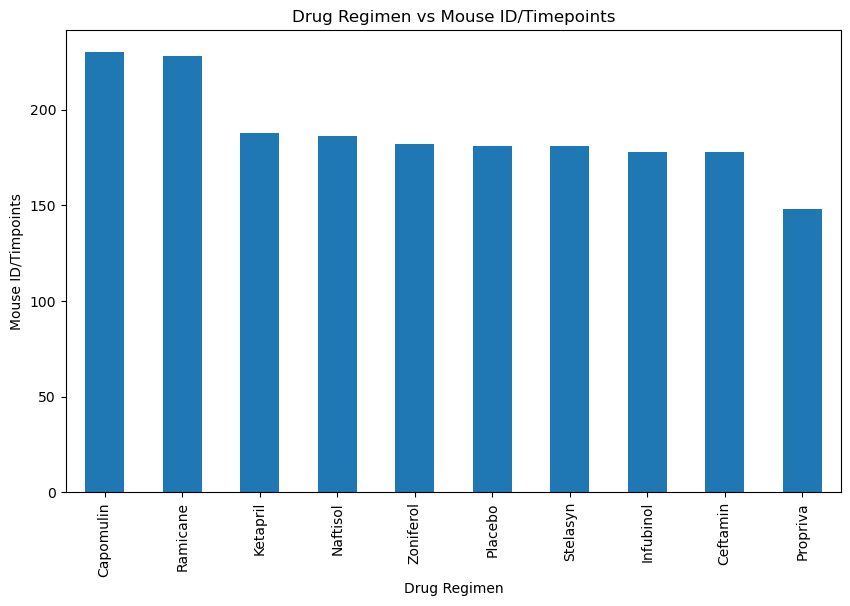

In [28]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Group cleaned DataFrame by 'Drug Regimen' and count number of rows in each group
regimen_counts = cleaned_data['Drug Regimen'].value_counts()

# Create bar plot
regimen_counts.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.title('Drug Regimen vs Mouse ID/Timepoints')
plt.xlabel('Drug Regimen')
plt.ylabel('Mouse ID/Timpoints')

# Show plot
plt.show()

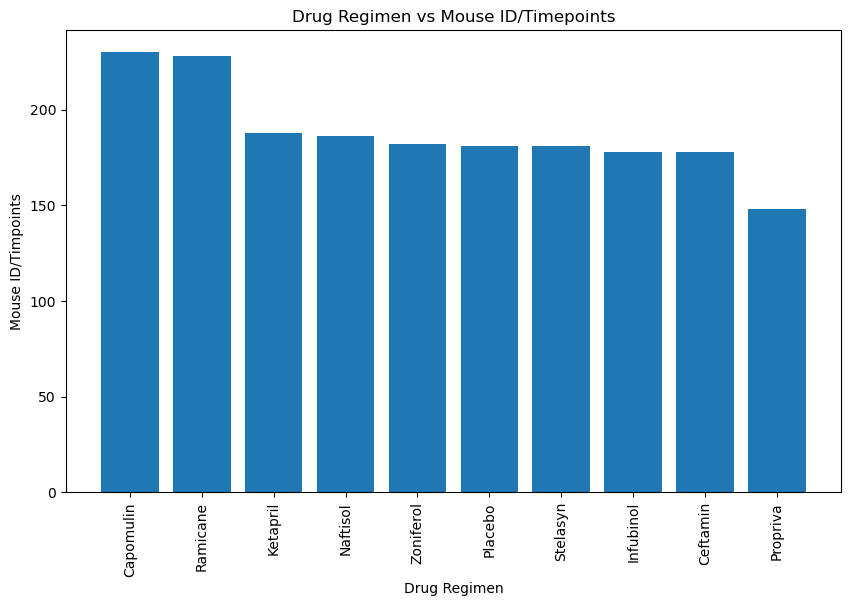

In [29]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# # Group the cleaned DataFrame by 'Drug Regimen' and count the number of rows in each group
regimen_countst = cleaned_data['Drug Regimen'].value_counts()

# Extract drug regimens and their value counts
regimens = regimen_counts.index
counts = regimen_counts.values

# Create bar plot (using Matplotlib)
plt.figure(figsize=(10, 6))
plt.bar(regimens, counts)

# Add labels and title
plt.title('Drug Regimen vs Mouse ID/Timepoints')
plt.xlabel('Drug Regimen')
plt.ylabel('Mouse ID/Timpoints')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show plot
plt.show()


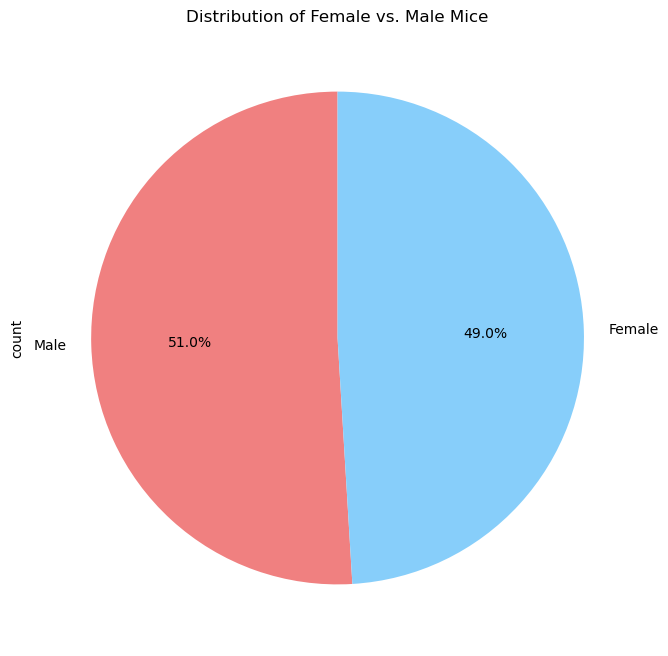

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Group the cleaned DataFrame by 'Sex' and count the number of mice in each group
sex_counts = cleaned_data['Sex'].value_counts()

# Create pie plot
sex_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8), colors=['lightcoral', 'lightskyblue'])

# Add title
plt.title('Distribution of Female vs. Male Mice')

# Show plot
plt.show()

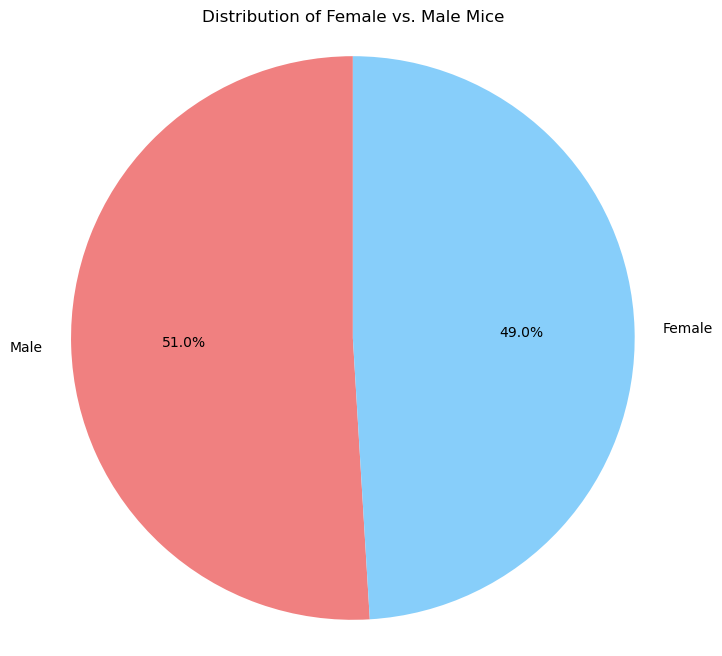

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Group the cleaned DataFrame by 'Sex' and count the number of mice in each group
sex_counts = cleaned_data['Sex'].value_counts()

# Create pie plot using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])

# Add title
plt.title('Distribution of Female vs. Male Mice')

# Show plot
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Create a DataFrame containing only the specified treatment regimens
target_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = cleaned_data[cleaned_data['Drug Regimen'].isin(target_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(last_timepoint_df, filtered_data, on=['Mouse ID', 'Timepoint'], how='left')

# Display the final tumor volume for each mouse in the specified treatment regimens
(final_tumor_volume_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']])


,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a275,Ceftamin,62.999356
3,a411,Ramicane,38.407618
4,a444,Ramicane,43.047543
...,...,...,...
95,y769,Ceftamin,68.594745
96,y793,Capomulin,31.896238
97,y865,Ceftamin,64.729837
98,z578,Ramicane,30.638696


In [33]:
# Put treatments into a list for FOR LOOP (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Loop through each treatment regimen
for treatment in treatments:
    # Filter the final_tumor_volume_df for the current treatment regimen
    treatment_data = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == treatment]
    #final_tumor_volume_df.loc[final_tumor_volume_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Get the tumor volume data for the current treatment regimen
    tumor_volume = treatment_data['Tumor Volume (mm3)']
    
    # Append the tumor volume data to the list
    tumor_volume_data.append(tumor_volume)
    #tumor_volume_data.append(treatment_data)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_volume.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Find potential outliers
    potential_outliers = treatment_data[(treatment_data['Tumor Volume (mm3)'] < lower_bound) | (treatment_data['Tumor Volume (mm3)'] > upper_bound)]
    
    # Display the results
    print(f"Results for {treatment}:")
    print(f"IQR: {iqr}")
    print(f"Potential outliers: {potential_outliers['Tumor Volume (mm3)'].tolist()}")
    print("\n")
    
# If all the tumor volumes for the mice in the 'Capomulin' group are the same at the final timepoint, 
# then the IQR would indeed be 0.0.


Results for Capomulin:
IQR: 7.781863460000004
Potential outliers: []


Results for Ramicane:
IQR: 9.098536719999998
Potential outliers: []


Results for Infubinol:
IQR: 11.477135160000003
Potential outliers: [36.3213458]


Results for Ceftamin:
IQR: 15.577752179999997
Potential outliers: []




In [34]:
print(tumor_volume_data)

[9     38.982878
12    38.939633
24    30.485985
25    37.074024
26    40.159220
32    47.685963
33    37.311846
34    38.125164
35    38.753265
45    41.483008
49    38.846876
51    28.430964
53    33.329098
64    46.539206
65    32.377357
68    41.581521
70    23.343598
72    40.728578
73    34.455298
78    31.023923
82    40.658124
83    39.952347
88    36.041047
90    28.484033
96    31.896238
Name: Tumor Volume (mm3), dtype: float64, 3     38.407618
4     43.047543
5     38.810366
7     32.978522
16    38.342008
17    33.397653
19    37.311236
21    40.659006
27    29.128472
29    33.562402
30    36.374510
37    31.560470
38    36.134852
40    22.050126
50    30.564625
54    31.095335
62    45.220869
63    36.561652
66    37.225650
67    43.419381
71    30.276232
77    40.667713
87    43.166373
94    44.183451
98    30.638696
Name: Tumor Volume (mm3), dtype: float64, 0     67.973419
1     65.525743
6     57.031862
8     66.083066
14    72.226731
15    36.321346
18    60.969711
20 

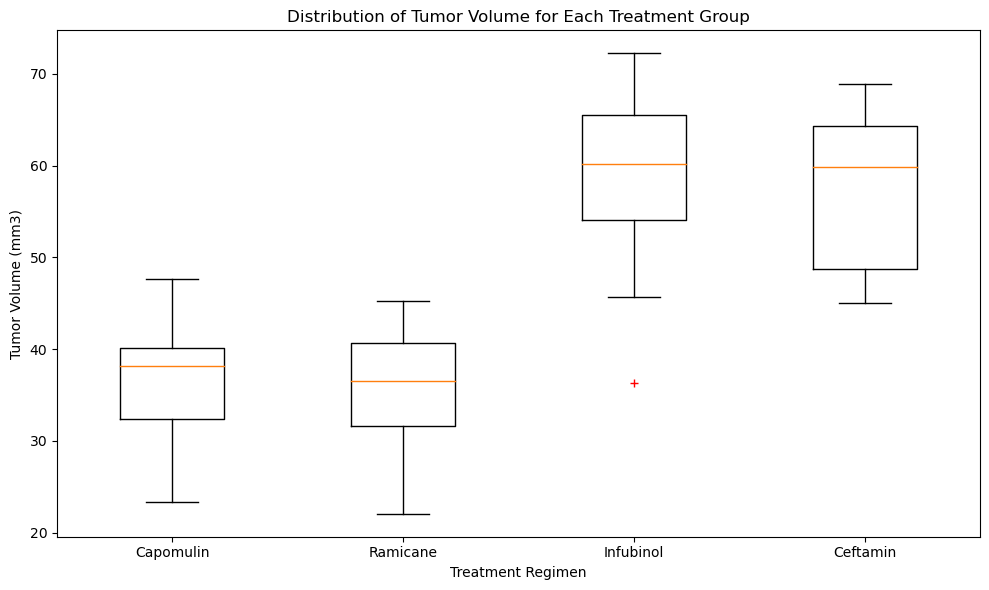

In [35]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10,6))
plt.boxplot(tumor_volume_data, labels=treatments, sym='r+')

# Add labels and title
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')

# Show plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Line and Scatter Plots

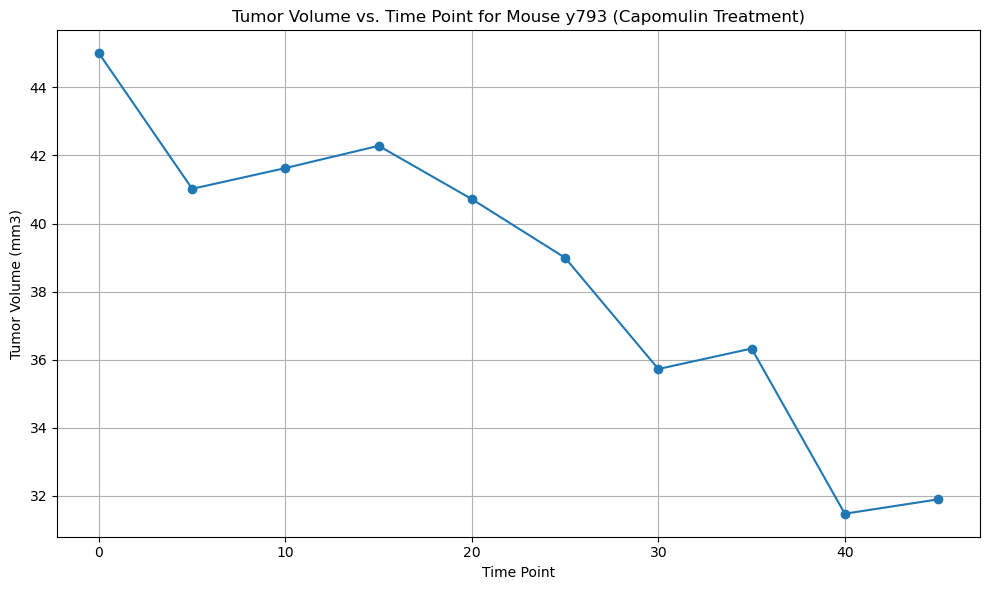

In [36]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Choose a specific mouse (e.g., 'Mouse_ID') treated with Capomulin
selected_mouse = 'y793'  # Replace 'Your_Mouse_ID' with the actual Mouse ID you want to analyze

# Filter the data for the selected mouse and Capomulin treatment
capomulin_data = cleaned_data[(cleaned_data['Drug Regimen'] == 'Capomulin') & (cleaned_data['Mouse ID'] == selected_mouse)]

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], marker='o', linestyle='-')

# Add labels and title
plt.title(f'Tumor Volume vs. Time Point for Mouse {selected_mouse} (Capomulin Treatment)')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')

# Show Plot
plt.grid(True)
plt.tight_layout()
plt.show()

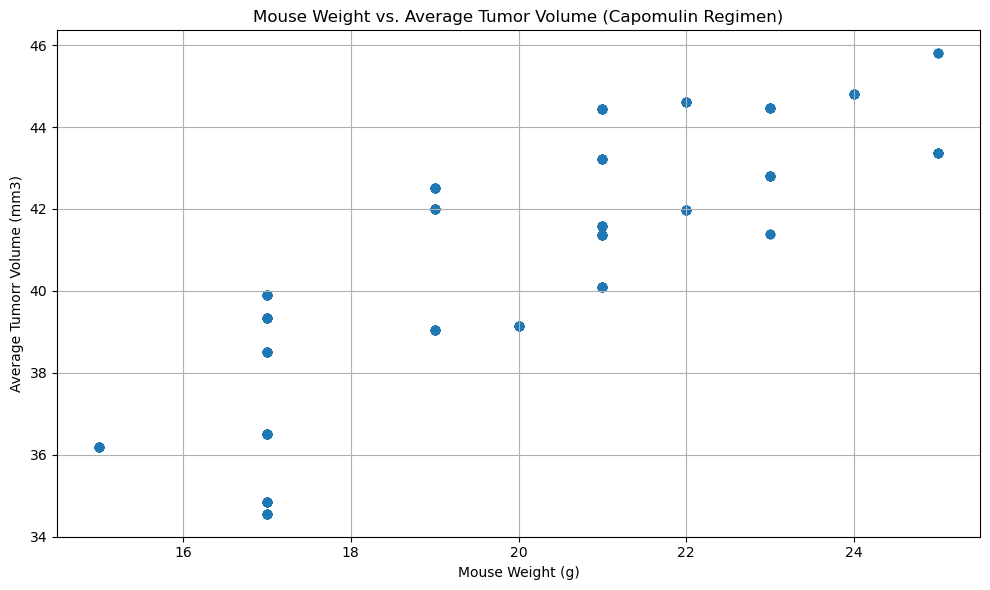

In [37]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter data for Capomulin 
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Calculate average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge average tumor volume data with mouse weight data
average_tumor_weight_data = pd.merge(average_tumor_volume, capomulin_data[['Mouse ID', 'Weight (g)']], on='Mouse ID')

# Create scattter plot
plt.figure(figsize=(10,6))
plt.scatter(average_tumor_weight_data['Weight (g)'], average_tumor_weight_data['Tumor Volume (mm3)'], marker='o')

# Add labels and title
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumorr Volume (mm3)')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

## Correlation and Regression

In [38]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


# Calculate correlation coefficient
correlation = average_tumor_weight_data.corr().loc['Weight (g)', 'Tumor Volume (mm3)']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(average_tumor_weight_data['Weight (g)'], average_tumor_weight_data['Tumor Volume (mm3)'])

# Create scatter plot
plt.figure(figsize=(10,6))
plt.scatter(average_tumor_weight_data['Weight (g)'], average_tumor_weight_data['Tumor Volume (mm3)'], marker='o')

# Add labels and title
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Plot linear regression line
plt.plot(average_tumor_weight_data['Weight (g)'], intercept + slope * average_tumor_weight_data['Weight (g)'], 'r', label=f'R = {correlation:.2f}')

# Show the plot with the regression line and correlation coefficient
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Display the correlation coefficient
print(f"Correlation Coefficient (R): {correlation:.2f}")

ValueError: could not convert string to float: 'b128'